In [92]:
#import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
#import dataset
df = pd.read_csv("fraud.csv")
df.head()

,claim_number,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,...,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud,month,day,year
0,1,46,M,1.0,85,38301,1,1,Rent,80006,...,7530.940993,9.0,Compact,12885.45235,white,16161.33381,0,12,16,2016
1,3,21,F,0.0,75,30445,0,1,Rent,15021,...,2966.024895,4.0,Large,29429.45218,white,28691.96422,0,2,12,2015
2,4,49,F,0.0,87,38923,0,1,Own,20158,...,6283.888333,3.0,Compact,21701.18195,white,22090.94758,1,12,6,2016
3,5,58,F,1.0,58,40605,1,0,Own,15024,...,6169.747994,4.0,Medium,13198.27344,other,38329.58106,1,5,5,2016
4,6,38,M,1.0,95,36380,1,0,Rent,50034,...,4541.387150,7.0,Medium,38060.21122,gray,25876.56319,0,10,27,2015


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17998 entries, 0 to 17997
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   claim_number             17998 non-null  int64  
 1   age_of_driver            17998 non-null  int64  
 2   gender                   17998 non-null  object 
 3   marital_status           17998 non-null  float64
 4   safty_rating             17998 non-null  int64  
 5   annual_income            17998 non-null  int64  
 6   high_education_ind       17998 non-null  int64  
 7   address_change_ind       17998 non-null  int64  
 8   living_status            17998 non-null  object 
 9   zip_code                 17998 non-null  int64  
 10  claim_day_of_week        17998 non-null  object 
 11  accident_site            17998 non-null  object 
 12  past_num_of_claims       17998 non-null  int64  
 13  witness_present_ind      17998 non-null  float64
 14  liab_prct             

In [4]:
#finding count of missing values in each column
df.isna().sum()

claim_number               0
age_of_driver              0
gender                     0
marital_status             0
safty_rating               0
annual_income              0
high_education_ind         0
address_change_ind         0
living_status              0
zip_code                   0
claim_day_of_week          0
accident_site              0
past_num_of_claims         0
witness_present_ind        0
liab_prct                  0
channel                    0
policy_report_filed_ind    0
claim_est_payout           0
age_of_vehicle             0
vehicle_category           0
vehicle_price              0
vehicle_color              0
vehicle_weight             0
fraud                      0
month                      0
day                        0
year                       0
dtype: int64

In [5]:
df.describe()

,claim_number,age_of_driver,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,zip_code,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_price,vehicle_weight,fraud,month,day,year
count,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000
mean,14970.601622,43.695466,0.713079,73.562951,37367.655684,0.699189,0.577286,49875.595955,0.505001,0.230970,49.423269,0.600678,4971.092201,5.005834,23089.123114,23031.322385,0.156462,6.463385,15.734582,2015.493722
std,8659.940765,11.959819,0.452951,15.346807,2957.297249,0.458623,0.494004,29214.655149,0.955504,0.421465,33.678470,0.489773,2219.928556,2.260355,11988.429767,12052.385584,0.363303,3.443520,8.810833,0.499974
min,1.000000,18.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2457.329316,2429.429302,0.000000,1.000000,1.000000,2015.000000
25%,7479.250000,35.000000,0.000000,65.000000,35554.000000,0.000000,0.000000,20111.000000,0.000000,0.000000,17.000000,0.000000,3334.830653,3.000000,14279.574850,14164.122133,0.000000,3.000000,8.000000,2015.000000
50%,14965.500000,43.000000,1.000000,76.000000,37610.000000,1.000000,1.000000,50028.000000,0.000000,0.000000,50.000000,1.000000,4665.344988,5.000000,20948.879250,20838.150260,0.000000,7.000000,16.000000,2015.000000
75%,22467.750000,51.000000,1.000000,85.000000,39318.000000,1.000000,1.000000,80038.000000,1.000000,0.000000,81.000000,1.000000,6254.708103,6.000000,29562.232780,29430.446293,0.000000,9.000000,23.000000,2016.000000
max,30000.000000,229.000000,2.000000,100.000000,54333.000000,1.000000,1.000000,85083.000000,6.000000,1.000000,100.000000,1.000000,17218.345010,16.000000,127063.506000,123016.650400,1.000000,12.000000,31.000000,2016.000000


## EDA

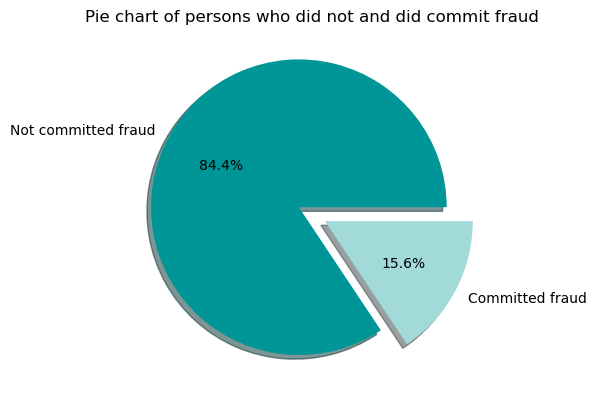

In [9]:
#pie chart of response variable
plt.pie(df['fraud'].value_counts(), labels=['Not committed fraud', 'Committed fraud'], colors=['#009596', '#A2D9D9'], explode=[0.1,0.1], autopct='%1.1f%%', shadow=True);
plt.title("Pie chart of persons who did not and did commit fraud");

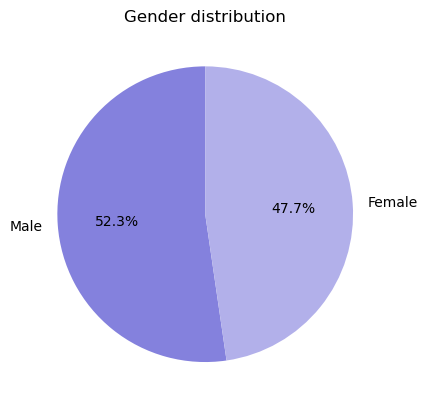

In [35]:
#pie chart of gender
plt.pie(df['gender'].value_counts(), labels=['Male', 'Female'], colors=['#8481DD', '#B2B0EA'], startangle=90, autopct='%1.1f%%');
plt.title("Gender distribution");

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


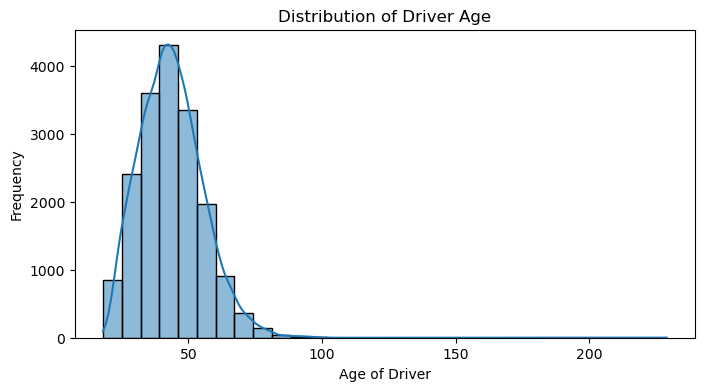

In [33]:
#Histogram for Age of Driver
plt.figure(figsize=(8, 4))
sns.histplot(df['age_of_driver'], bins=30, kde=True)
plt.title('Distribution of Driver Age')
plt.xlabel('Age of Driver')
plt.ylabel('Frequency')
plt.show()

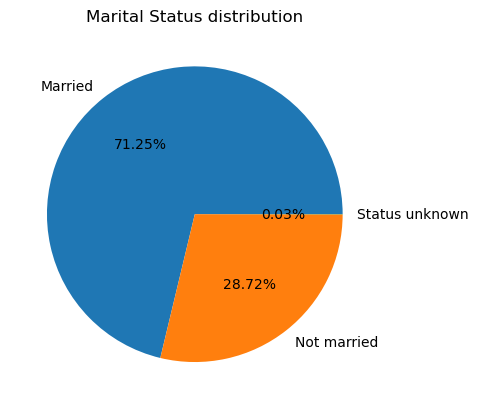

In [20]:
#pie chart of gender
plt.pie(df['marital_status'].value_counts(), labels=['Married', 'Not married', 'Status unknown'], autopct='%1.2f%%');
plt.title("Marital Status distribution");

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


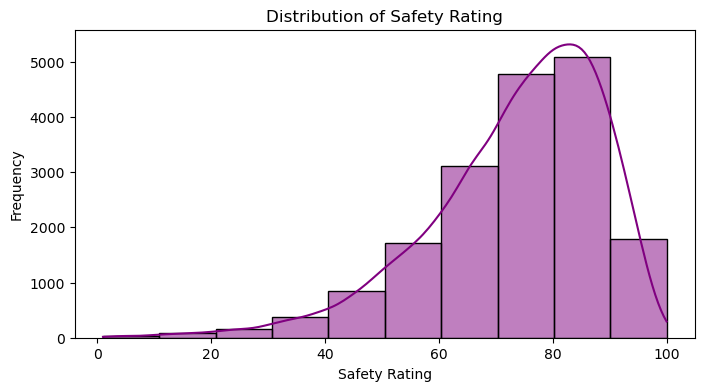

In [32]:
#Histogram for Safety Rating
plt.figure(figsize=(8, 4))
sns.histplot(df['safty_rating'], bins=10, kde=True, color='purple')
plt.title('Distribution of Safety Rating')
plt.xlabel('Safety Rating')
plt.ylabel('Frequency')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


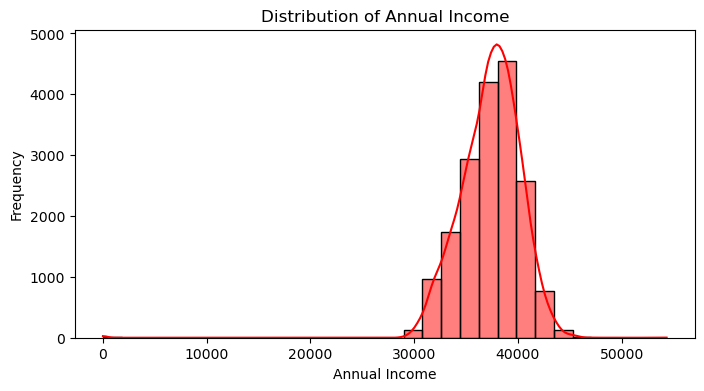

In [31]:
#Histogram for Annual Income
plt.figure(figsize=(8, 4))
sns.histplot(df['annual_income'], bins=30, kde=True, color='red')
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

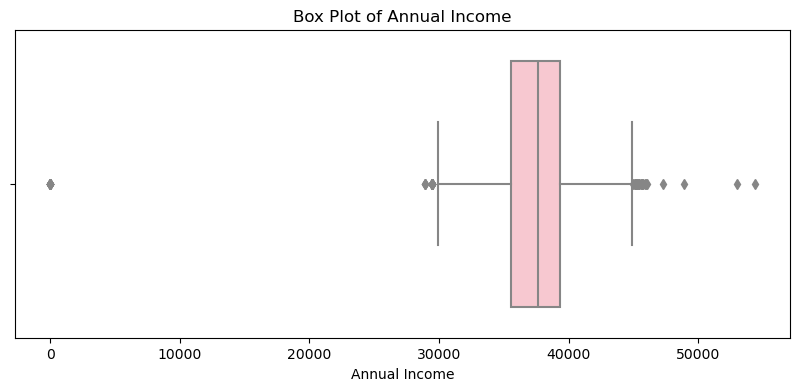

In [30]:
#Box Plot for Annual Income
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['annual_income'], color='pink')
plt.title('Box Plot of Annual Income')
plt.xlabel('Annual Income')
plt.show()

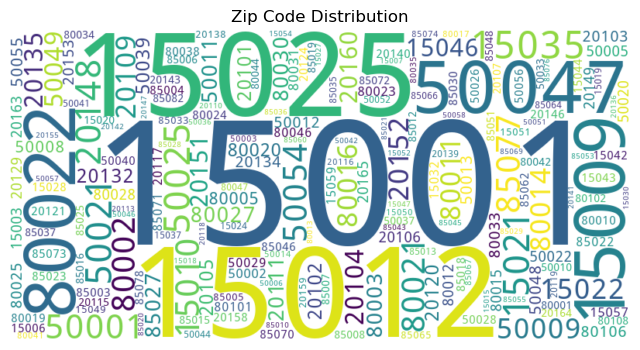

In [94]:
#zipcode distribution wordcloud
df['zip_code'] = df['zip_code'].astype(str)
zip_counts = df['zip_code'].value_counts().to_dict()
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(zip_counts)
plt.figure(figsize=(8, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Zip Code Distribution')
plt.show()


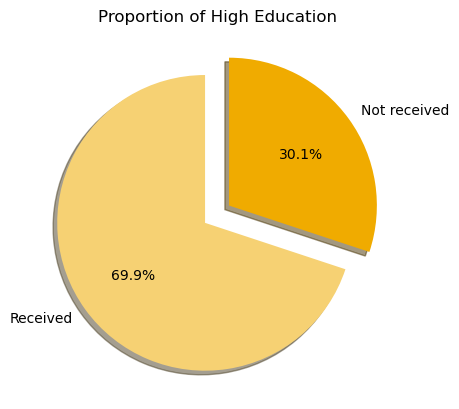

In [39]:
#Pie Chart for High Education Indicator
plt.pie(df['high_education_ind'].value_counts(), labels=['Received', 'Not received'], colors=['#F6D173', '#F0AB00'], explode=[0.1,0.1], startangle=90, autopct='%1.1f%%', shadow=True);
plt.title('Proportion of High Education')
plt.ylabel('')
plt.show()

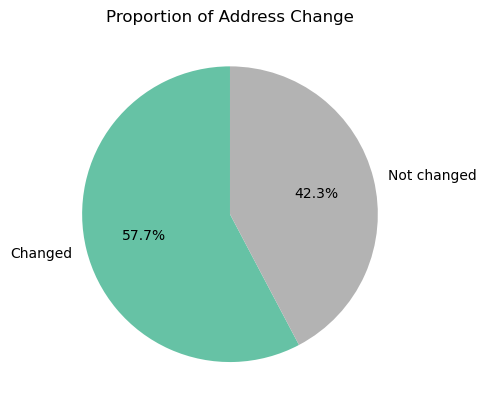

In [47]:
#Pie Chart for Address Change Indicator
df['address_change_ind'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set2', labels=['Changed', 'Not changed'])
plt.title('Proportion of Address Change')
plt.ylabel('')
plt.show()

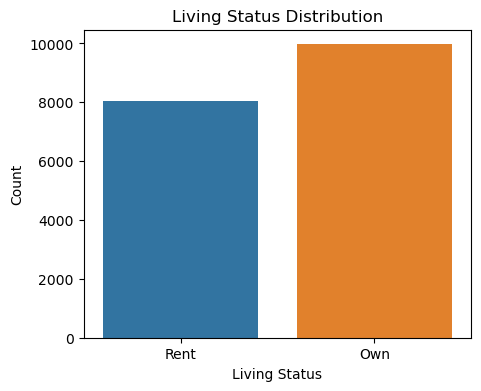

In [56]:
#Bar Chart for Living Status
plt.figure(figsize=(5, 4))
sns.countplot(x='living_status', data=df)
plt.title('Living Status Distribution')
plt.xlabel('Living Status')
plt.ylabel('Count')
plt.show()

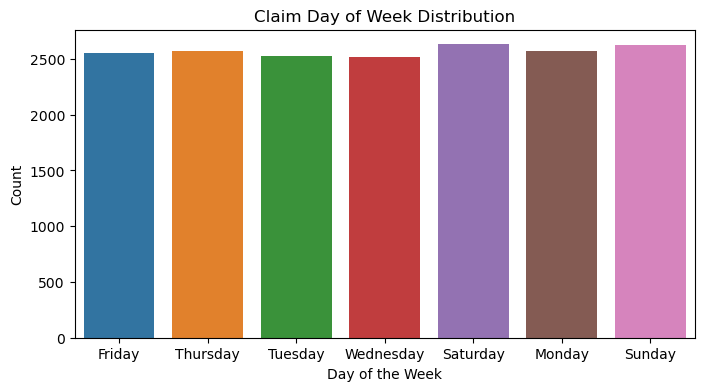

In [60]:
#Bar Chart for Claim Day of Week
plt.figure(figsize=(8, 4))
sns.countplot(x='claim_day_of_week', data=df)
plt.title('Claim Day of Week Distribution')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.show()

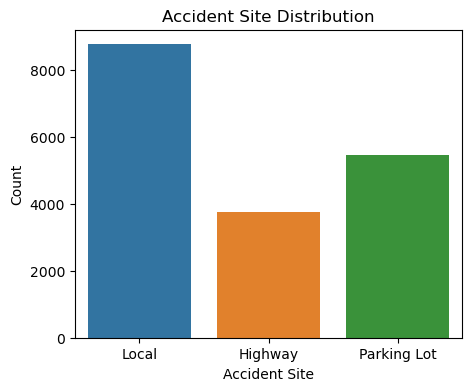

In [63]:
#Bar Chart for Accident Site
plt.figure(figsize=(5, 4))
sns.countplot(x='accident_site', data=df)
plt.title('Accident Site Distribution')
plt.xlabel('Accident Site')
plt.ylabel('Count')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


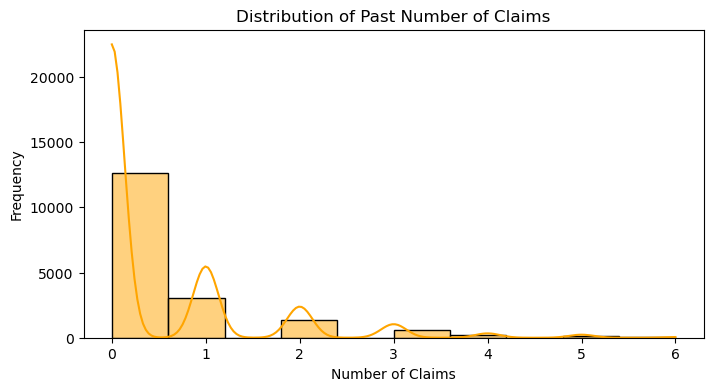

In [66]:
#Histogram for Past Number of Claims
plt.figure(figsize=(8, 4))
sns.histplot(df['past_num_of_claims'], bins=10, kde=True, color='orange')
plt.title('Distribution of Past Number of Claims')
plt.xlabel('Number of Claims')
plt.ylabel('Frequency')
plt.show()

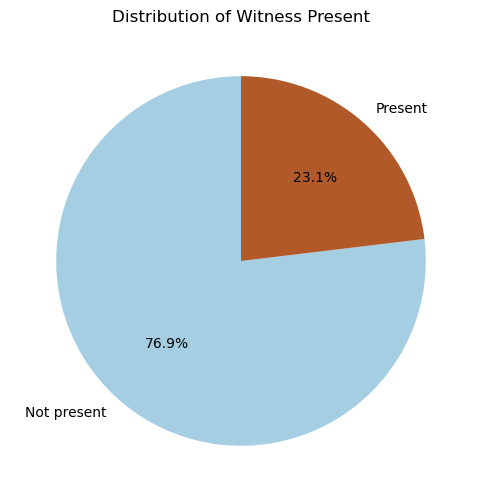

In [73]:
# 13. Pie Chart for Witness Present Indicator
plt.figure(figsize=(10, 6))
df['witness_present_ind'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, labels=['Not present', 'Present'], cmap='Paired')
plt.title('Distribution of Witness Present')
plt.ylabel('')
plt.show()

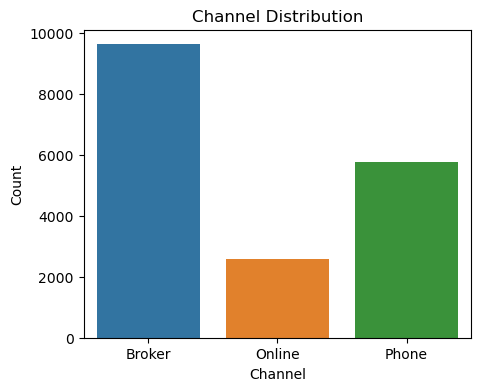

In [77]:
#Bar Chart for Channel
plt.figure(figsize=(5, 4))
sns.countplot(x='channel', data=df)
plt.title('Channel Distribution')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.show()

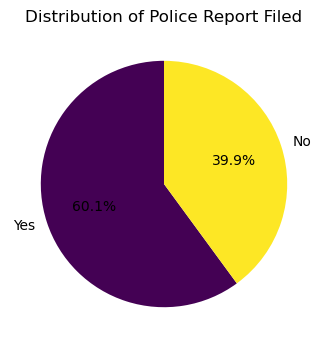

In [81]:
#Pie Chart for Police Report Filed Indicator
plt.figure(figsize=(6, 4))
df['policy_report_filed_ind'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis', labels=['Yes', 'No'])
plt.title('Distribution of Police Report Filed')
plt.ylabel('')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


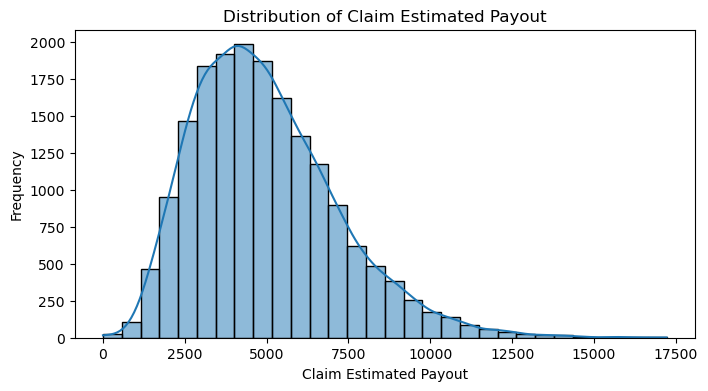

In [84]:
# 17. Histogram for Claim Estimated Payout
plt.figure(figsize=(8, 4))
sns.histplot(df['claim_est_payout'], bins=30, kde=True)
plt.title('Distribution of Claim Estimated Payout')
plt.xlabel('Claim Estimated Payout')
plt.ylabel('Frequency')
plt.show()

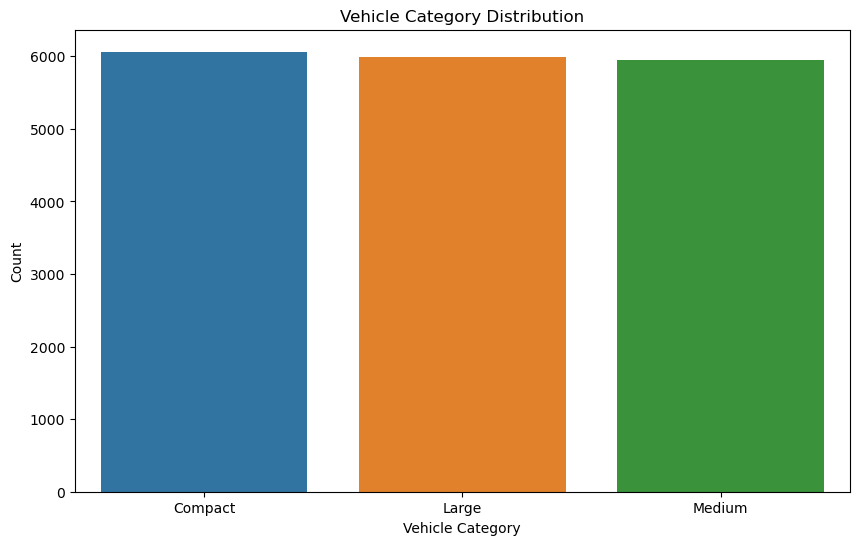

In [86]:
#Bar Chart for Vehicle Category
plt.figure(figsize=(10, 6))
sns.countplot(x='vehicle_category', data=df)
plt.title('Vehicle Category Distribution')
plt.xlabel('Vehicle Category')
plt.ylabel('Count')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


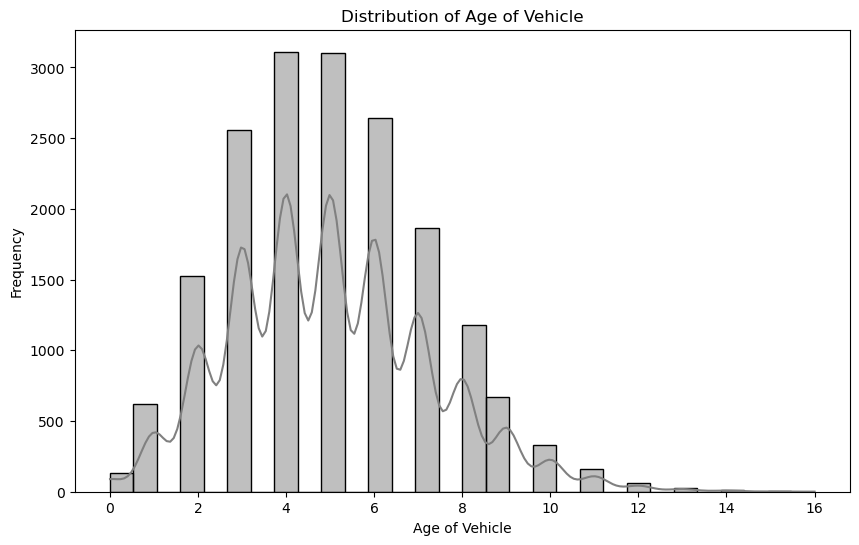

In [87]:
#Histogram for Age of Vehicle
plt.figure(figsize=(10, 6))
sns.histplot(df['age_of_vehicle'], bins=30, kde=True, color='grey')
plt.title('Distribution of Age of Vehicle')
plt.xlabel('Age of Vehicle')
plt.ylabel('Frequency')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


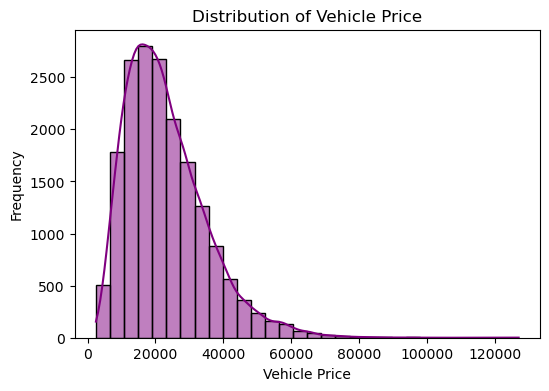

In [89]:
#Histogram for Vehicle Price
plt.figure(figsize=(6, 4))
sns.histplot(df['vehicle_price'], bins=30, kde=True, color='purple')
plt.title('Distribution of Vehicle Price')
plt.xlabel('Vehicle Price')
plt.ylabel('Frequency')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


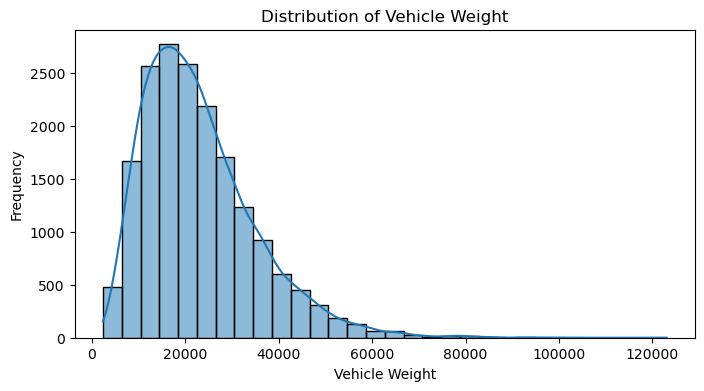

In [90]:
#Histogram for Vehicle Weight
plt.figure(figsize=(8, 4))
sns.histplot(df['vehicle_weight'], bins=30, kde=True)
plt.title('Distribution of Vehicle Weight')
plt.xlabel('Vehicle Weight')
plt.ylabel('Frequency')
plt.show()

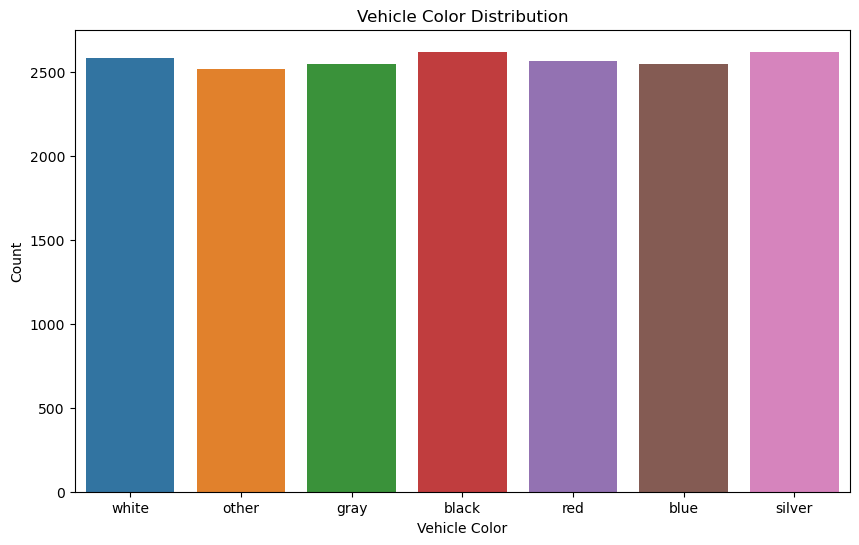

In [91]:
#Bar Chart for Vehicle Color
plt.figure(figsize=(10, 6))
sns.countplot(x='vehicle_color', data=df)
plt.title('Vehicle Color Distribution')
plt.xlabel('Vehicle Color')
plt.ylabel('Count')
plt.show()

## Clustering